In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
## Load training dataset
# Make sure you are in the main folder('..\Algal-bloom-prediction-machine-learning')
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()
os.chdir('Trainning data')

print('Load training data (containing nutrient observations)')
lakename = input('Lake name in short: ')
winter = input('Winter data or not? (Y/N)')
if winter =='Y':
    all_df = pd.read_csv(lakename+'_Observation_df.csv',sep = '\t',parse_dates = ['Date'])
else:
    all_df = pd.read_csv(lakename+'_Observation_df_nowinter.csv',sep = '\t',parse_dates = ['Date'])

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Algal-bloom-prediction-machine-learning\Algal-bloom-prediction-machine-learning\Scenario2\LSTM\ME
Load training data (containing nutrient observations)
Lake name in short: Ekoln
Winter data or not? (Y/N)N


In [52]:
def metrics(obs_df,model_df,nutrient,test_time):
    df = obs_df[['Date',nutrient]].merge(model_df[['Date',nutrient]],how = 'inner',on = 'Date')
    df.columns = ['Date','Obs','PM']
    Comp = df[df['Date']>=test_time[0]]
    RMSE = sqrt(mean_squared_error(Comp['Obs'], Comp['PM']))
    R2 = r2_score(Comp['Obs'], Comp['PM'])
    print(nutrient+' RMSE: %.2f' % RMSE)
    print(nutrient+' R2: %.2f' % R2)
    print('\n')
    return Comp

In [5]:
# Create scatter comparison
def compare(observation,GBR,LSTM):    
    comparison = observation[['Date','Chl']].merge(GBR[['Date','Chl']],on = 'Date',how = 'inner').merge(LSTM[['Date','Chl']],on = 'Date',how = 'inner')
    comparison.columns = ['Date','Observation','GBR prediction','LSTM prediction']
    
    return comparison

In [49]:
def plot_figure(observation,GBR,LSTM,comparison,chl_name,test_time,marker,ms,lw,figure_name):
    plt.style.use('seaborn-whitegrid')
    size = 20
    markersize = 8
    params = {'legend.fontsize': 16,
              'axes.labelsize': size,
              'axes.titlesize': size,
              'xtick.labelsize': size*0.75,
              'ytick.labelsize': size*0.75,
              'font.family':'Times New Roman'}
    plt.rcParams.update(params)

    f = plt.figure(figsize = (14,16))
    gs = f.add_gridspec(2,2,height_ratios = [3.5,3])
    gs.tight_layout(f,rect=[0, 0, 0.5, 1.0])
    f_ax1 = f.add_subplot(gs[0,:])
    f_ax2 = f.add_subplot(gs[1,0])
    f_ax3 = f.add_subplot(gs[1,1])
    
    if marker == True:
        observation.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'r*',ms = markersize,alpha = 0.9,label = 'Observation')
        GBR.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'ko',ms = ms,alpha = 0.5,label = 'GBR prediction')
        LSTM.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'bo',ms = ms,alpha = 0.5,label = 'LSTM prediction')
    else:
        observation.plot(x = 'Date',y = chl_name,ax = f_ax1,style = 'r*',ms = markersize,alpha = 0.9,label = 'Observation')
        GBR.plot(x = 'Date',y = chl_name,ax = f_ax1,color = 'k',lw = lw,alpha = 0.8,label = 'GBR prediction')
        LSTM.plot(x = 'Date',y = chl_name,ax = f_ax1,color = 'b',lw = lw,alpha = 0.8,label = 'LSTM prediction')
        #PB.plot(x = 'Date',y = 'Chl',ax = f_ax1,color = 'g',lw = lw,alpha = 0.8,label = 'PB prediction')
        
    f_ax1.set_xlim(test_time[0],test_time[1])
    f_ax1.set_ylabel('$mg/m^{3}$')
    f_ax1.set_title('(a)',x=0.02, y=0.92)
    f_ax1.grid(axis = 'y')

    f_ax2.scatter(comparison['Observation'],comparison['GBR prediction'],s = 20,c = 'black')
    f_ax2.plot(comparison['Observation'],comparison['Observation'],lw  =1.5,color = 'red',alpha = 0.7)
    f_ax2.set_xlabel('Observation')
    f_ax2.set_ylabel('GBR prediction')
    f_ax2.set_xlim((0,50))
    f_ax2.set_ylim((0,50))
    f_ax2.set_title('(b)',x=0.04, y=0.9)

    f_ax3.scatter(comparison['Observation'],comparison['LSTM prediction'],s = 20,c = 'blue')
    f_ax3.plot(comparison['Observation'],comparison['Observation'],lw  =1.5,color = 'red',alpha = 0.7)
    f_ax3.set_xlabel('Observation')
    f_ax3.set_ylabel('LSTM prediction')
    f_ax3.set_xlim((0,50))
    f_ax3.set_ylim((0,50))
    f_ax3.set_title('(c)',x=0.04, y=0.9)

    plt.subplots_adjust(hspace=0.3)
    f.savefig(figure_name)

In [7]:
def plot_nutrients_comparison(Observation,GBR,LSTM,nutrients,nrows,ncol,time_range,ylim,ylabel,subtitle):
    plt.style.use('seaborn-whitegrid')
    size=24
    params = {'legend.fontsize': 20,
              'axes.labelsize': size,
              'axes.titlesize': size,
              'xtick.labelsize': size*0.75,
              'ytick.labelsize': size*0.75,
              'font.family':'Times New Roman'}
    plt.rcParams.update(params)

    Observation.plot(x = 'Date',y =nutrients,ax = ax[nrows][ncol], style= 'r*',ms = 10,alpha = 0.9,
                  label = 'Observed_'+nutrients.split('(')[0],
                  xlim = time_range,ylim = ylim)
    #PB.plot(x = 'Date',y =nutrients,ax = ax[nrows][ncol],c = 'g',lw = 2,alpha = 0.7,
    #        label = 'PB model_'+nutrients.split('(')[0],
    #        xlim = time_range,ylim = ylim)
    GBR.plot(x = 'Date',y =nutrients,ax = ax[nrows][ncol],c = 'k',lw = 2,
                   label = 'GBR_'+nutrients.split('(')[0],alpha = 0.7,
                   xlim = time_range,ylim = ylim)
    LSTM.plot(x = 'Date',y = nutrients,ax = ax[nrows][ncol], c= 'b',lw = 2,
                  label = 'LSTM_'+nutrients.split('(')[0],alpha = 0.7,
                xlim = time_range,ylim = ylim)
    ax[nrows][ncol].set_ylabel(ylabel)
    ax[nrows][ncol].legend(frameon=False,ncol=2)
    ax[nrows][ncol].patch.set_alpha(0.5)
    ax[nrows][ncol].grid(axis = 'y')
    ax[nrows][ncol].set_title(subtitle,x=0.04, y=0.92)
    #plt.tight_layout()

In [71]:
# Load the predicted results
cd = os.getcwd()
print(cd)
while cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()

os.chdir('Scenario2\\GBR\\'+lakename)
GBR = pd.read_csv(lakename+'_GBR predicted nutrient and Chl.csv',parse_dates = ['Date'])
os.chdir('..\\..')
os.chdir('LSTM\\'+lakename)
LSTM = pd.read_csv('LSTM predicted nutrient and Chl data.csv',sep='\t',parse_dates = ['Date'])

C:\Users\shuli278\Documents\D\PDF_Uppsala\7-Python code of ML algorithm\GitHub\Algal-bloom-prediction-machine-learning\Algal-bloom-prediction-machine-learning\Trainning data


FileNotFoundError: [Errno 2] No such file or directory: 'LSTM predicted nutrient and Chl data.csv'

In [34]:
LSTM

,Date,SST,delT,U,AirT,Prec,swr,MLD,W,Ice_d,days_from_iceoff,inflow,outflow,O2,N_Nit,PO4,N_Amm,Si,CAR_dic,Chl
0,1979-03-01,0.764389,-2.620929,1.593941,-2.992495,0.4762,185.210999,1.548121,0.000000,93.000000,-46,7.635921,7.867276,434.914856,36.579849,2.858155,13.903327,43.765980,3901.149658,7.097477
1,1979-03-02,0.920434,-2.468256,4.249354,-5.280408,0.6036,188.470290,1.501116,0.000000,93.000000,-45,7.287510,7.936561,434.914856,36.579849,2.858155,13.903327,43.765980,3901.149658,7.097477
2,1979-03-03,0.727219,-2.664457,3.202813,-1.517493,9.6772,75.183791,0.650000,0.000000,93.000000,-44,8.554949,8.209879,434.914856,36.579849,2.858155,13.903327,43.765980,3901.149658,7.097477
3,1979-03-04,0.174805,-3.218732,1.919469,0.616671,3.0956,109.187751,0.650000,0.000000,93.000000,-43,9.942403,8.346746,434.914856,36.579849,2.858155,13.903327,43.765980,3901.149658,7.097477
4,1979-03-05,0.084467,-3.311187,2.815478,-2.330826,0.0822,84.293958,0.650000,0.000000,93.000000,-42,9.816358,8.669169,434.914856,36.579849,2.858155,13.903327,43.765980,3901.149658,7.097477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,2015-11-26,6.730435,0.778029,3.169159,4.285010,25.0532,25.239375,25.000000,0.000000,100.958333,223,16.804982,11.418577,337.377838,13.061831,4.135699,21.169281,32.546326,3886.783691,6.883196
10458,2015-11-27,6.626987,0.000000,5.685337,2.327086,12.5068,66.596083,25.000000,0.000000,100.958333,224,15.235910,13.823858,338.115784,13.464437,4.300817,21.253782,47.237068,3938.664551,6.914966
10459,2015-11-28,6.360925,1.181410,2.800493,-0.982494,0.0000,81.125292,23.150000,1.769155,100.958333,225,17.910961,14.750084,337.865784,13.367914,4.392172,21.321959,70.303116,3907.656494,6.262680
10460,2015-11-29,6.137963,1.383737,1.984414,-1.319994,0.0000,42.381708,21.874141,2.731964,100.958333,226,18.948644,15.256056,337.856110,13.891962,4.277739,21.375145,45.928936,3882.826660,6.336897


In [39]:
print(GBR.columns)
n_Nut=int(input('Number of nutrients: '))
Nut_list=[]
for i in range(n_Nut):
    Nut=input('Nutrient: ')
    Nut_list.append(Nut)

Index(['Date', 'delT', 'U', 'AirT', 'Prec', 'swr', 'MLD', 'W', 'Ice_d',
       'days_from_iceoff', 'inflow', 'outflow', 'O2', 'N_Nit', 'N_Amm', 'PO4',
       'Si', 'CAR_dic', 'Chl'],
      dtype='object')
Number of nutrients: 7
Nutrient: O2
Nutrient: N_Nit
Nutrient: N_Amm
Nutrient: PO4
Nutrient: Si
Nutrient: CAR_dic
Nutrient: Chl


test starts in year:2012
test ends in year:2016
Chlorophyll name:Chl


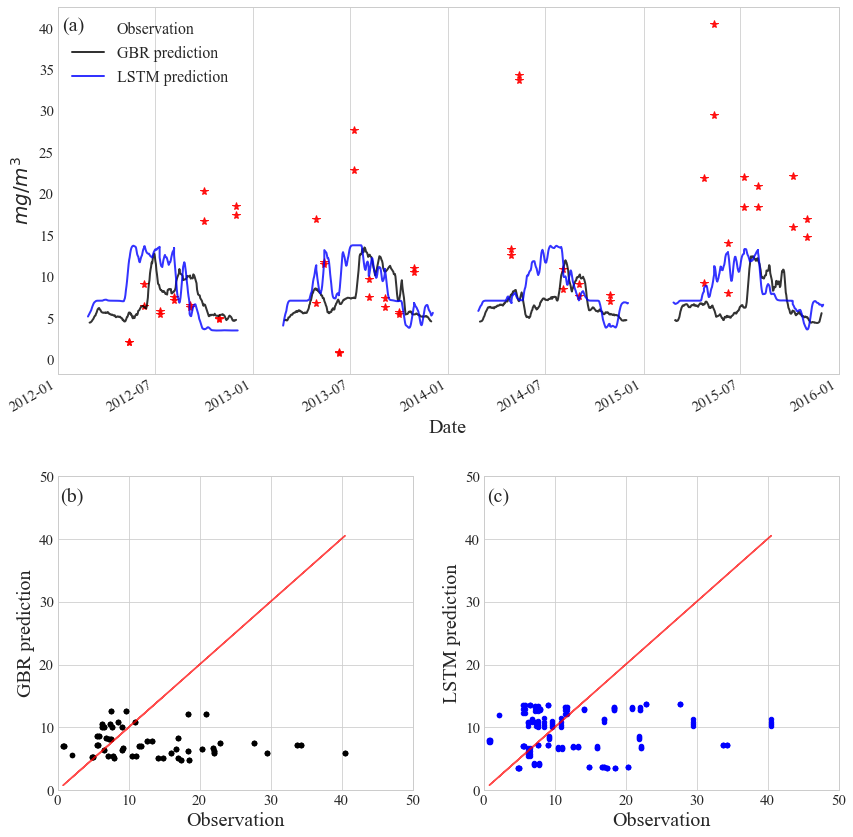

In [50]:
# Create the time-series of prediction
test_time = [pd.Timestamp(int(input('test starts in year:')),1,1),pd.Timestamp(int(input('test ends in year:')),1,1)]
ts = pd.DataFrame(pd.date_range(start =test_time[0],
                                end = test_time[1]),columns = ['Date'])
Nut_list.insert(0,'Date')
GBR_ts = ts.merge(GBR,how = 'left',on = 'Date')[Nut_list]
LSTM_ts = ts.merge(LSTM,how = 'left',on = 'Date')[Nut_list]
Nut_list.pop(0)
LSTM_ts[Nut_list] = LSTM_ts[Nut_list].rolling(7,min_periods = 1,center=True).mean()
chl_name=input('Chlorophyll name:')

comparison = compare(all_df,GBR_ts,LSTM_ts)
plot_figure(all_df,GBR_ts,LSTM_ts,comparison,chl_name,test_time,False,8,2,'Chl_comparison.png')

In [55]:
GBR_comp = metrics(all_df,GBR,'Chl',test_time)
LSTM_comp = metrics(all_df,LSTM,'Chl',test_time)

Chl RMSE: 10.67
Chl R2: -0.53


Chl RMSE: 10.00
Chl R2: -0.36




In [56]:
print(Nut_list)

['O2', 'N_Nit', 'N_Amm', 'PO4', 'Si', 'CAR_dic', 'Chl']


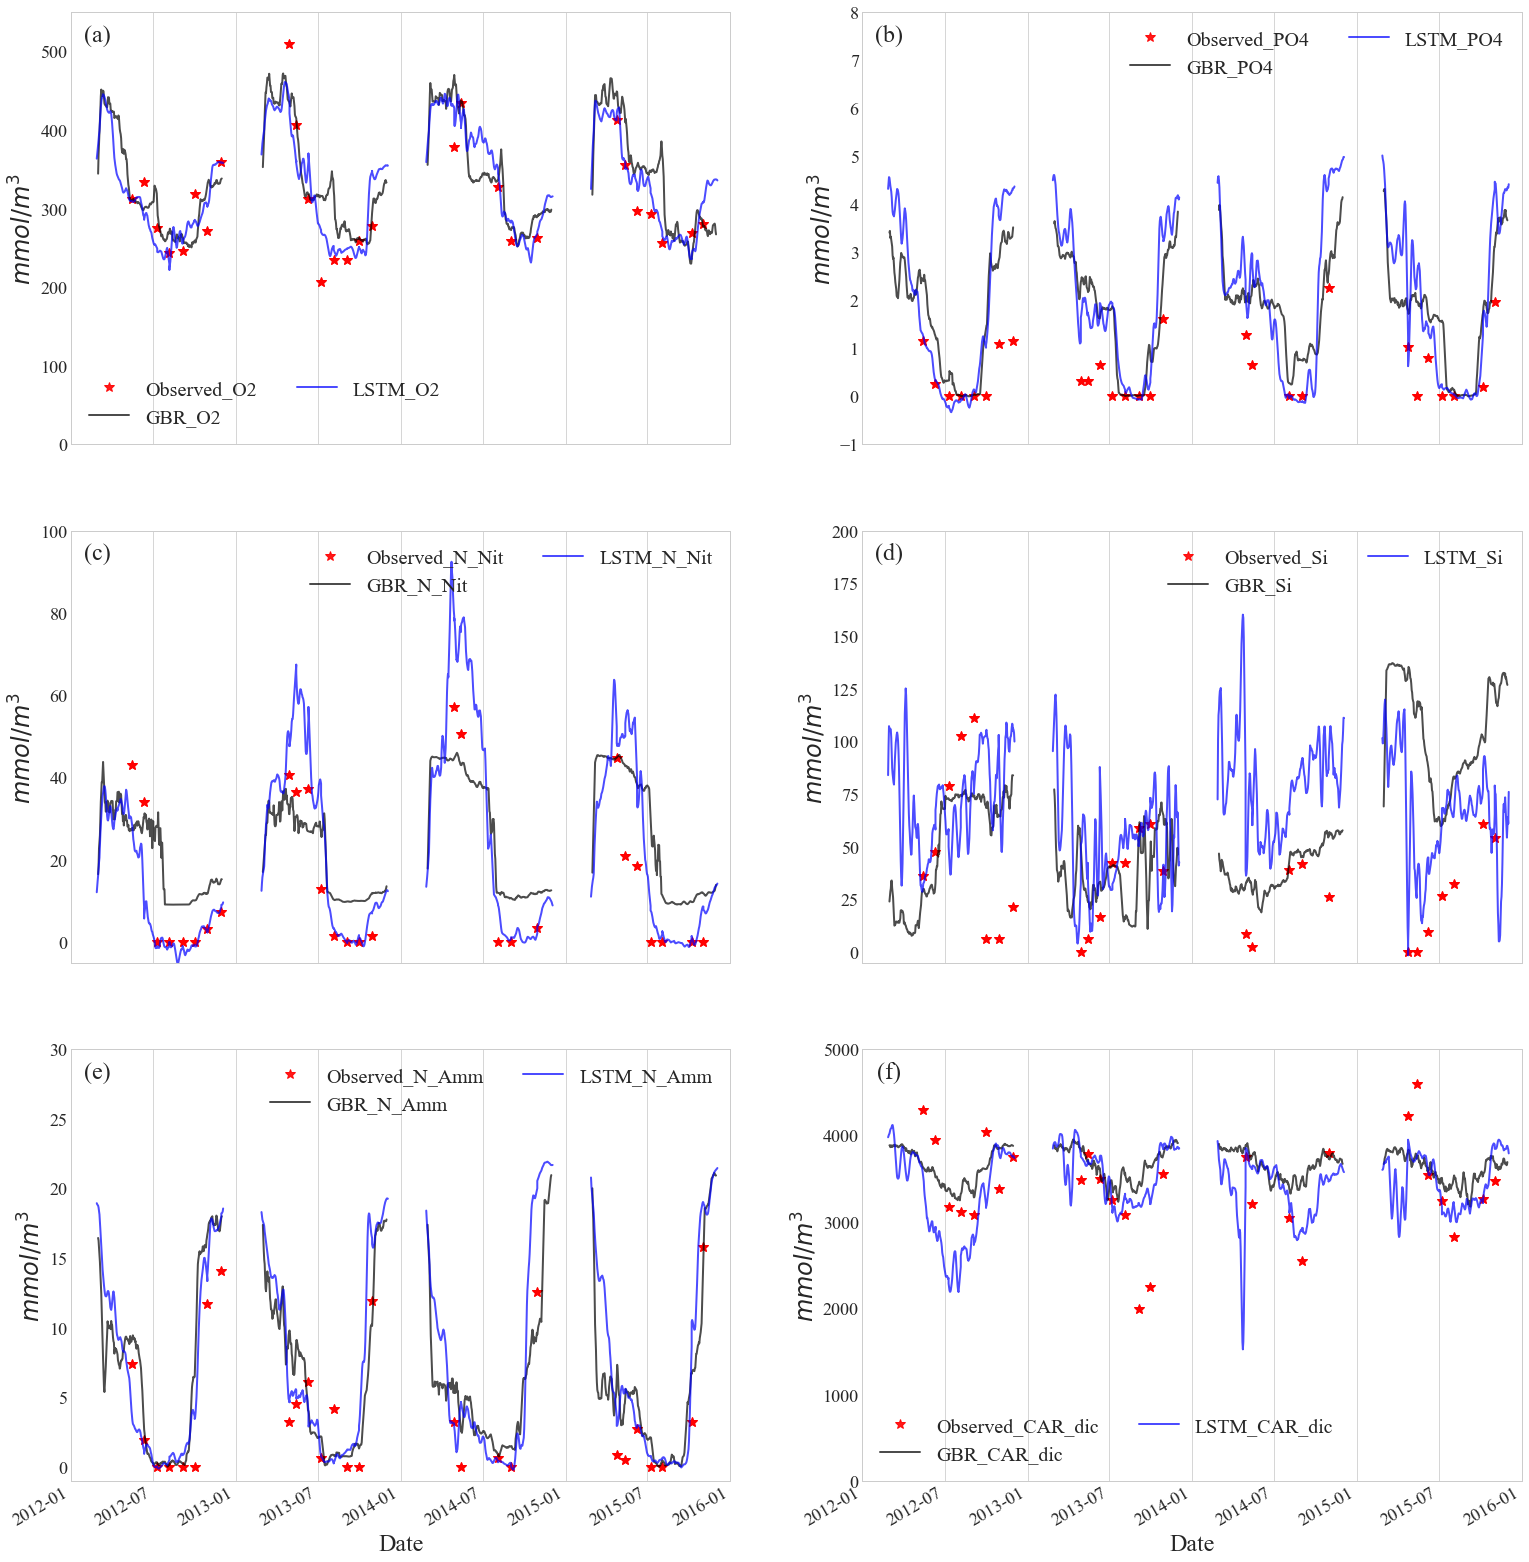

In [66]:
f1,ax = plt.subplots(nrows = 3,ncols = 2,sharex=True,figsize = (26,30))
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'O2',0,0,test_time,(0,550),'$mmol/m^{3}$','(a)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'N_Nit',1,0,test_time,(-5,100),'$mmol/m^{3}$','(c)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'N_Amm',2,0,test_time,(-1,30),'$mmol/m^{3}$','(e)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'PO4',0,1,test_time,(-1,8),'$mmol/m^{3}$','(b)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'Si',1,1,test_time,(-5,200),'$mmol/m^{3}$','(d)')
plot_nutrients_comparison(all_df,GBR_ts,LSTM_ts,'CAR_dic',2,1,test_time,(0,5000),'$mmol/m^{3}$','(f)')

In [67]:
f1.savefig('nutrient_comparison.png',dpi = 300)